# Gradient Boost & Extreme Gradient Boost

## Análise de Sentimentos com Gradient Boosting e XGBoosting

Este projeto visa realizar análise de sentimentos em textos utilizando técnicas de aprendizado de máquina. Os modelos implementados são Gradient Boosting (GBoosting) e Extreme Gradient Boosting (XGBoosting).

### Dataset

O dataset utilizado neste projeto é o [Financial Sentiment Analysis](https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis) disponível no Kaggle. Certifique-se de fazer o upload do arquivo CSV para o ambiente de trabalho do Google Colab ou diretório do Jupyter Notebook.

### Pré-requisitos

Antes de começar, é necessário instalar as seguintes bibliotecas:

```bash
pip install numpy pandas scikit-learn xgboost SMOTE PorterStemmer imblearn


### Importar bibliotecas

In [118]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem.porter import PorterStemmer

# Limpar o texto usando NLTK
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Bibliotecas para ilustrar graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para plotar nuvem de palavras
from wordcloud import WordCloud


### Baixar recursos necessários do NLTK

In [119]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


### Carregar o dataset

In [120]:
dataset = "data.csv"
df = pd.read_csv(dataset)

text_column = 'Sentence'
sentiment_column = 'Sentiment'

df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


### Função para limpar o texto

In [121]:
def preprocess_text(text):
    # Remover caracteres especiais e números
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Converter para minúsculas
    text = text.lower()
    
    # Tokenização
    words = nltk.word_tokenize(text)
    
    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lematização
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Reconstituir o texto
    text = ' '.join(words)
    
    return text


### Aplicar a função de pré-processamento ao texto

In [122]:

df['cleaned_text'] = df[text_column].apply(preprocess_text)
df['cleaned_text']

0       geosolutions technology leverage benefon gps s...
1                             esi low bk real possibility
2       last quarter componenta net sale doubled eur e...
3       according finnish russian chamber commerce maj...
4       swedish buyout firm sold remaining percent sta...
                              ...                        
5837    rising cost forced packaging producer huhtamak...
5838    nordic walking first used summer training meth...
5839    according shipping company viking line eu deci...
5840    building home improvement trade sale decreased...
5841    helsinki afx kci konecranes said order four ho...
Name: cleaned_text, Length: 5842, dtype: object

### Função para Mostrar nuvem de palavras

In [123]:
def show_cloud(sentiment):
    allwords = ' '.join(word for word in df[df['Sentiment'] == sentiment]['Sentence'])
    wordcloud = WordCloud(width=500, height=300, max_font_size=100, stopwords=stopwords.words('english')).generate(allwords)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Neutras:

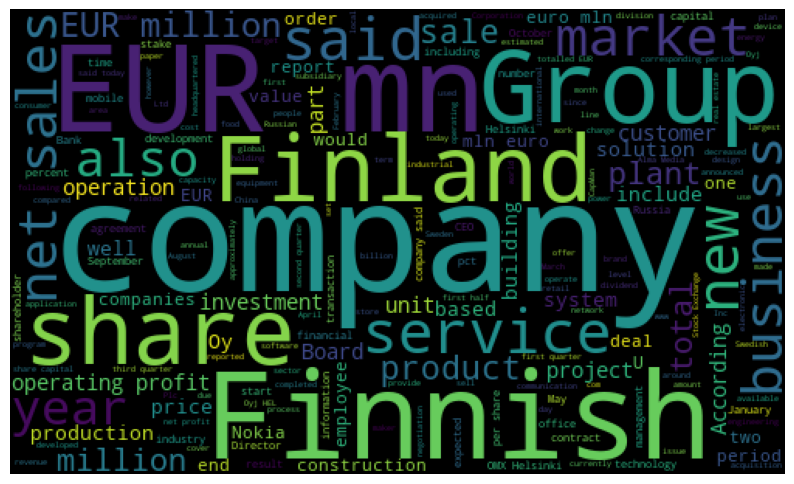

In [124]:
show_cloud('neutral')

### Positivas:

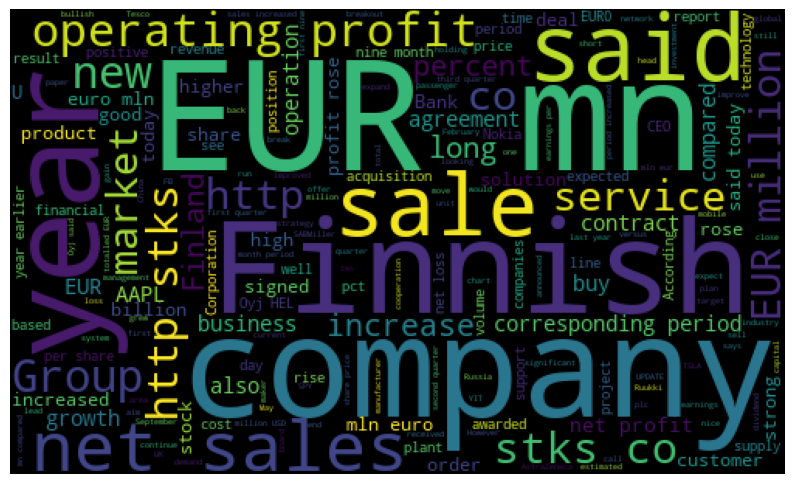

In [125]:
show_cloud('positive')

### Negativas:

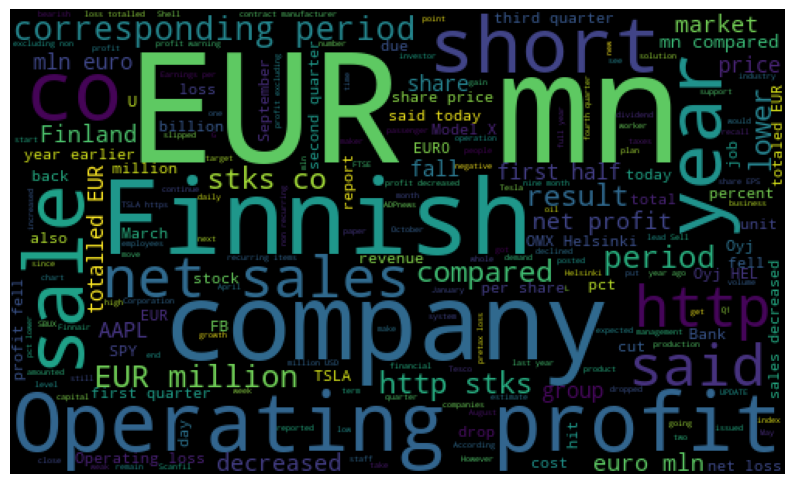

In [126]:
show_cloud('negative')

### Converter as classes para valores numéricos e extraindo postags

In [127]:
class_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df[sentiment_column] = df[sentiment_column].map(class_mapping)

### Dividir o conjunto de dados em treino e teste

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df[sentiment_column], test_size=0.1, random_state=3)

### Vetorização do texto usando TF-IDF

In [134]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Treinar o modelo Gradient Boosting

In [135]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)

GradientBoostingClassifier()

### Fazer previsões no conjunto de teste

In [136]:
gb_predictions = gb_model.predict(X_test_tfidf)

### Treinar o modelo XGBoost

In [137]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


### Fazer previsões no conjunto de teste


In [138]:
xgb_predictions = xgb_model.predict(X_test_tfidf)

### Avaliar a acurácia do modelo Gradient Boosting

In [139]:
print("Acurácia do Gradient Boosting:", accuracy_score(y_test, gb_predictions))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, gb_predictions))
print("\nRelatório de Classificação:")
print(classification_report(y_test, gb_predictions))

Acurácia do Gradient Boosting: 0.6803418803418804

Matriz de Confusão:
[[ 16  57   8]
 [ 11 299  19]
 [  3  89  83]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.53      0.20      0.29        81
           1       0.67      0.91      0.77       329
           2       0.75      0.47      0.58       175

    accuracy                           0.68       585
   macro avg       0.65      0.53      0.55       585
weighted avg       0.68      0.68      0.65       585



### Gráfico de Matriz de Confusão para Gradient Boosting

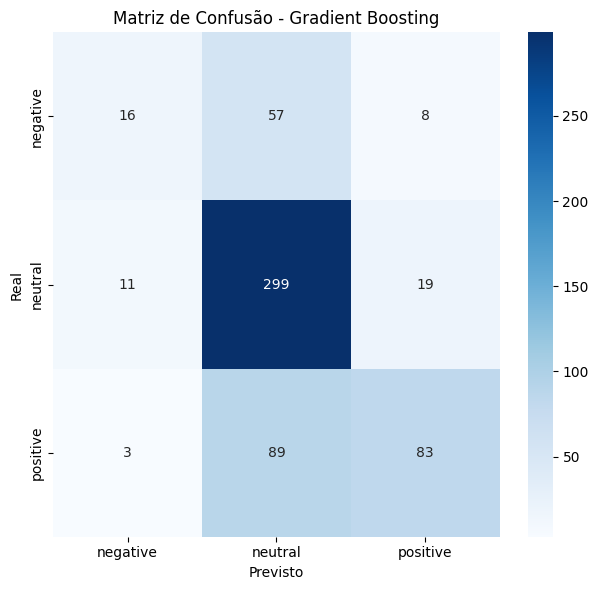

In [140]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Matriz de Confusão - Gradient Boosting')
plt.xlabel('Previsto')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

### Gráfico de Dispersão para Gradient Boosting

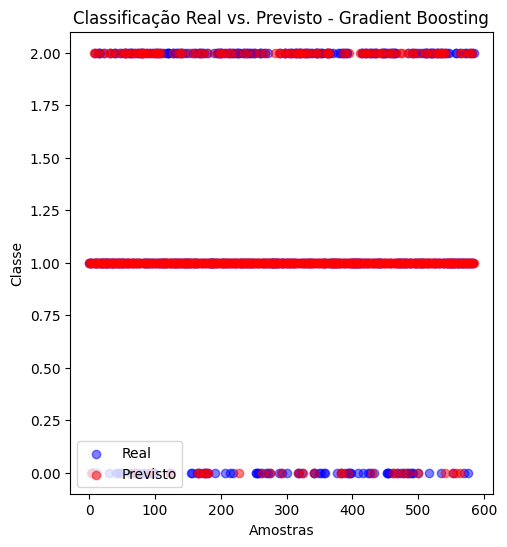

In [141]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real', alpha=0.5)
plt.scatter(range(len(gb_predictions)), gb_predictions, color='red', label='Previsto', alpha=0.5)
plt.title('Classificação Real vs. Previsto - Gradient Boosting')
plt.xlabel('Amostras')
plt.ylabel('Classe')
plt.legend()

### Avaliar a acurácia do modelo XGBoost

In [142]:
print("\nAcurácia do XGBoost:", accuracy_score(y_test, xgb_predictions))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, xgb_predictions))
print("\nRelatório de Classificação:")
print(classification_report(y_test, xgb_predictions))


Acurácia do XGBoost: 0.6752136752136753

Matriz de Confusão:
[[ 14  54  13]
 [ 32 272  25]
 [  4  62 109]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.28      0.17      0.21        81
           1       0.70      0.83      0.76       329
           2       0.74      0.62      0.68       175

    accuracy                           0.68       585
   macro avg       0.57      0.54      0.55       585
weighted avg       0.65      0.68      0.66       585



### Gráfico de Matriz de Confusão para XGBoost

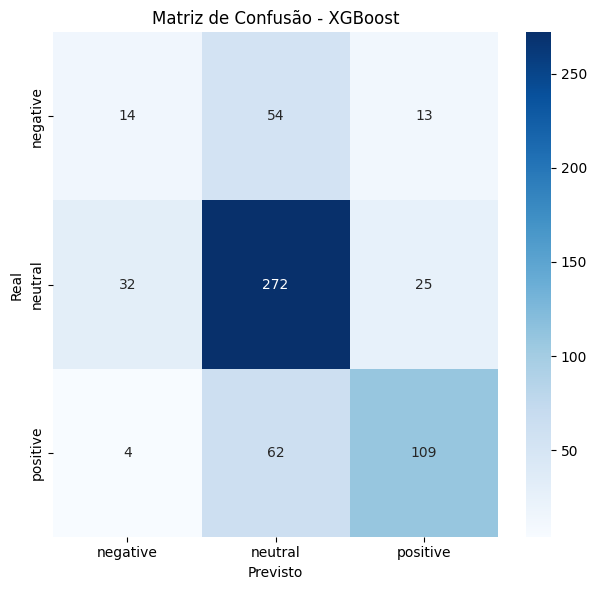

In [143]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

### Gráfico de Dispersão para XGBoost

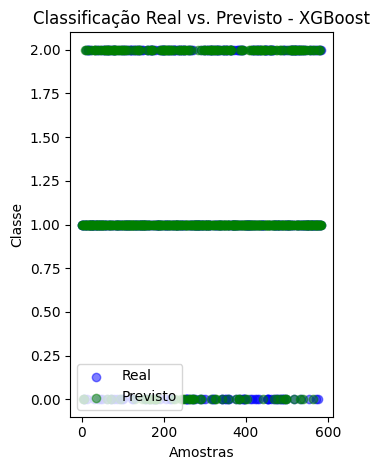

In [144]:
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real', alpha=0.5)
plt.scatter(range(len(xgb_predictions)), xgb_predictions, color='green', label='Previsto', alpha=0.5)
plt.title('Classificação Real vs. Previsto - XGBoost')
plt.xlabel('Amostras')
plt.ylabel('Classe')
plt.legend()

plt.tight_layout()
plt.show()

### Gráfico de Acurácia Comparativa

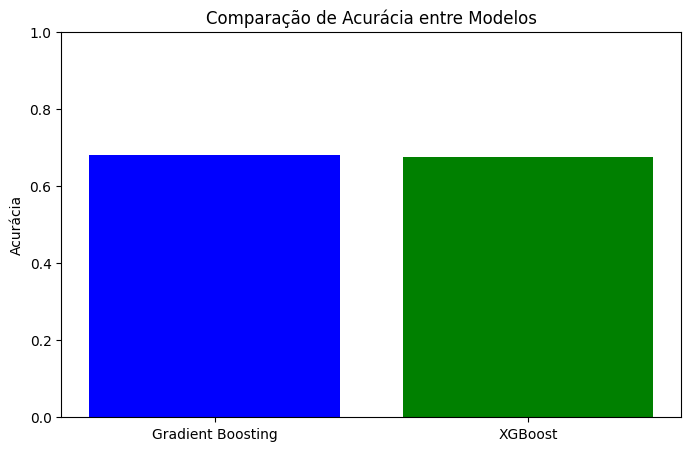

In [145]:
model_names = ['Gradient Boosting', 'XGBoost']
accuracies = [accuracy_score(y_test, gb_predictions), accuracy_score(y_test, xgb_predictions)]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.title('Comparação de Acurácia entre Modelos')
plt.ylabel('Acurácia')
plt.show()